<a href="https://colab.research.google.com/github/allozgo/battlefield/blob/main/DeepLearning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hola")

Hola


In [2]:
!nvidia-smi

Mon Nov 20 08:47:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv", header = None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [41]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [7]:
columns = 	["Sex",
	"Length",
	"Diameter",
	"Height",
	"Whole weight",
	"Shucked weight",
	"Viscera weight",
	"Shell weight",
	"Rings"]

In [9]:
df.columns = columns

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df.shape

(4177, 9)

In [14]:
X = df.drop("Sex", axis = 1)
sex_map = {"M":0, "F":1, "I":2}
y = df["Sex"].map(sex_map)

In [15]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
y.head()

0    0
1    0
2    1
3    0
4    2
Name: Sex, dtype: int64

In [17]:
X.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [23]:
X_train_t

array([[0.64189189, 0.65546218, 0.11061947, ..., 0.17906517, 0.2077728 ,
        0.35714286],
       [0.54054054, 0.50420168, 0.08849558, ..., 0.11915734, 0.13801694,
        0.25      ],
       [0.31081081, 0.28571429, 0.0619469 , ..., 0.04344964, 0.04334828,
        0.21428571],
       ...,
       [0.58783784, 0.57142857, 0.11061947, ..., 0.17511521, 0.18584953,
        0.35714286],
       [0.67567568, 0.68907563, 0.10619469, ..., 0.28703094, 0.2326856 ,
        0.28571429],
       [0.7027027 , 0.70588235, 0.14159292, ..., 0.30348914, 0.26856004,
        0.17857143]])

In [24]:
y_train

4038    2
1272    2
3384    1
3160    2
3894    0
       ..
3444    1
466     1
3092    0
3772    0
860     1
Name: Sex, Length: 3341, dtype: int64

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [49]:
from tensorflow.keras.optimizers import Adam
Adam??

In [50]:
model = Sequential()

In [52]:
model.add(Dense(20, activation = "relu", input_shape=(8,))) # El imput_shape siempre tiene que ser una tupla. Es el número de columnas que le viene

In [53]:
model.add(Dense(20, activation = "relu"))

In [54]:
model.add(Dense(20, activation = "relu"))

In [55]:
model.add(Dense(3, activation = "softmax"))

In [56]:
# adam.opt = Adam(learning_rate = 0.002)

model.compile(metrics=["accuracy"], optimizer = "adam", loss = "sparse_categorical_crossentropy") # binary_crossentropy, mean_squared_error

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                180       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 3)                 63        
                                                                 
Total params: 1503 (5.87 KB)
Trainable params: 1503 (5.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,  # Es el número de iteraciones
    validation_split = 0.15,
    batch_size = 32

)

Epoch 1/10
89/89 [==============================] - 6s 6ms/step - loss: 1.1215 - accuracy: 0.3325 - val_loss: 1.0591 - val_accuracy: 0.3426
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 1.0498 - accuracy: 0.4301 - val_loss: 1.0258 - val_accuracy: 0.4821
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.9933 - accuracy: 0.4977 - val_loss: 0.9619 - val_accuracy: 0.4920
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.9223 - accuracy: 0.5217 - val_loss: 0.9230 - val_accuracy: 0.4940
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8963 - accuracy: 0.5248 - val_loss: 0.9086 - val_accuracy: 0.5139
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8924 - accuracy: 0.5181 - val_loss: 0.9100 - val_accuracy: 0.5259
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8879 - accuracy: 0.5343 - val_loss: 0.9018 - val_accuracy: 0.5199
Epoch 8/10
89/89 [==

In [59]:
history = model.fit(
    X_train,
    y_train,
    epochs = 50,
    validation_split = 0.15,
    batch_size = 32)

Epoch 1/50
89/89 [==============================] - 2s 6ms/step - loss: 1.2898 - accuracy: 0.3385 - val_loss: 1.0908 - val_accuracy: 0.3546
Epoch 2/50
89/89 [==============================] - 0s 4ms/step - loss: 1.0917 - accuracy: 0.3568 - val_loss: 1.0761 - val_accuracy: 0.3865
Epoch 3/50
89/89 [==============================] - 0s 4ms/step - loss: 1.0760 - accuracy: 0.3734 - val_loss: 1.0590 - val_accuracy: 0.3904
Epoch 4/50
89/89 [==============================] - 0s 4ms/step - loss: 1.0477 - accuracy: 0.4445 - val_loss: 1.0238 - val_accuracy: 0.4880
Epoch 5/50
89/89 [==============================] - 0s 4ms/step - loss: 0.9904 - accuracy: 0.5308 - val_loss: 0.9641 - val_accuracy: 0.4960
Epoch 6/50
89/89 [==============================] - 0s 4ms/step - loss: 0.9362 - accuracy: 0.5248 - val_loss: 0.9290 - val_accuracy: 0.5219
Epoch 7/50
89/89 [==============================] - 0s 4ms/step - loss: 0.9100 - accuracy: 0.5382 - val_loss: 0.9116 - val_accuracy: 0.5199
Epoch 8/50
89/89 [==

In [62]:
history.history

{'loss': [1.2898166179656982,
  1.0916624069213867,
  1.0759660005569458,
  1.0476865768432617,
  0.9903910756111145,
  0.936242401599884,
  0.9099646806716919,
  0.900956928730011,
  0.8958438038825989,
  0.8946626782417297,
  0.8978286385536194,
  0.8928284645080566,
  0.8883242011070251,
  0.8846550583839417,
  0.8854601383209229,
  0.88644939661026,
  0.8861042857170105,
  0.8884642720222473,
  0.8852644562721252,
  0.8837332725524902,
  0.8835289478302002,
  0.8843718767166138,
  0.8871039152145386,
  0.8845570087432861,
  0.8840972781181335,
  0.8849167823791504,
  0.8828027248382568,
  0.8812974095344543,
  0.8812544345855713,
  0.8827841877937317,
  0.8826814293861389,
  0.885395348072052,
  0.880552351474762,
  0.8819864392280579,
  0.8804993033409119,
  0.8810532093048096,
  0.8813014030456543,
  0.8830145001411438,
  0.8783358335494995,
  0.8819295167922974,
  0.8781408667564392,
  0.8768333196640015,
  0.8800525069236755,
  0.8746692538261414,
  0.8746861219406128,
  0.8763

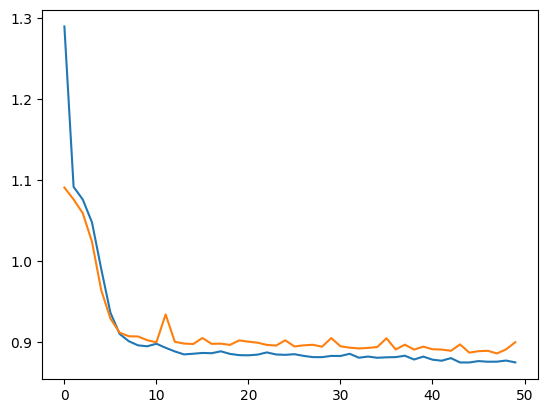

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [66]:
model = Sequential()

In [67]:
model.add(Dense(300, activation = "relu", input_shape=(8,)))

In [68]:
model.add(Dense(300, activation = "relu"))

In [69]:
model.add(Dense(300, activation = "relu"))

In [70]:
model.add(Dense(3, activation = "softmax"))

In [71]:
model.compile(metrics=["accuracy"], optimizer = "adam", loss = "sparse_categorical_crossentropy")

In [72]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,  # Es el número de iteraciones
    validation_split = 0.15,
    batch_size = 32
)

Epoch 1/10
89/89 [==============================] - 2s 6ms/step - loss: 1.0311 - accuracy: 0.4385 - val_loss: 0.9476 - val_accuracy: 0.4980
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.9292 - accuracy: 0.5153 - val_loss: 0.9165 - val_accuracy: 0.5199
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.9046 - accuracy: 0.5136 - val_loss: 0.8988 - val_accuracy: 0.5279
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8834 - accuracy: 0.5393 - val_loss: 0.8839 - val_accuracy: 0.5299
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8829 - accuracy: 0.5343 - val_loss: 0.8992 - val_accuracy: 0.5080
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8931 - accuracy: 0.5227 - val_loss: 0.8827 - val_accuracy: 0.5259
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8889 - accuracy: 0.5319 - val_loss: 0.8800 - val_accuracy: 0.5219
Epoch 8/10
89/89 [==

Aumento el número de nodos y no veo una mejora significativa, por lo que los datos dan para lo que dan

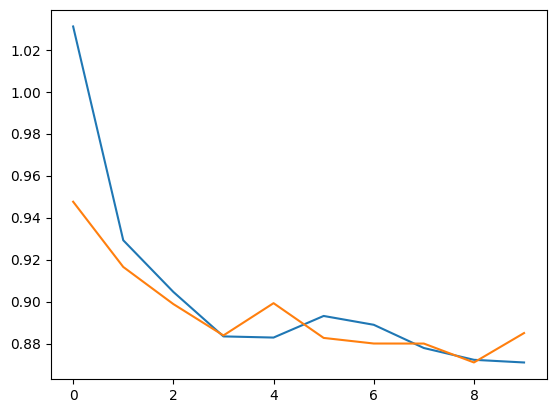

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200)
ada.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=200)

In [77]:
ada.score(X_train, y_train)

0.5920383118826699

In [78]:
ada.score(X_test, y_test)

0.5394736842105263

Nos da parecido, por  lo que vemos que no se puede rascar mucho más.